<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>
[[10.5, 9.0], [10.56717, 9.268445], [8.27532, 11.38221], [8.227458, 11.37764], [8.179511, 11.37211], [8.1315, 11.36561], [8.083443, 11.35814], [8.035361, 11.3497], [7.98727, 11.34027], [7.9392, 11.32987], [7.89116, 11.31848], [7.84317, 11.30611], [10.57166, 9.29981], [7.79526, 11.29275], [7.74744, 11.2784], [7.69974, 11.26305], [7.65217, 11.24672], [7.60476, 11.22939], [7.55752, 11.21107], [7.51048, 11.19176], [7.46366, 11.17146], [7.41707, 11.15017], [7.37075, 11.12789], [10.57552, 9.331439], [7.3247, 11.10463], [7.27896, 11.08039], [7.23353, 11.05516], [7.18845, 11.02896], [7.14373, 11.00179], [7.09939, 10.97365], [7.05546, 10.94454], [7.01195, 10.91448], [6.96888, 10.88347], [6.92628, 10.85151], [10.57873, 9.363319], [6.88417, 10.81862], [6.84256, 10.78479], [6.80148, 10.75003], [6.76095, 10.71436], [6.72098, 10.67778], [6.6816, 10.64031], [6.64282, 10.60194], [6.60467, 10.56269], [6.56716, 10.52257], [6.53032, 10.48159], [10.581

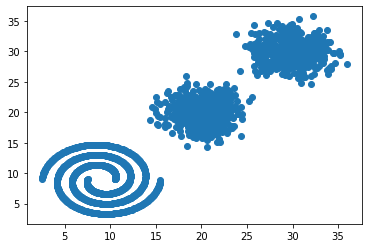

In [102]:
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

# 1 Jeu de données

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]
xaxis = []
yaxis = []

liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
    xaxis.append(data[i][0])
    yaxis.append(data[i][1])

print(liste) 

plt.scatter(xaxis, yaxis)

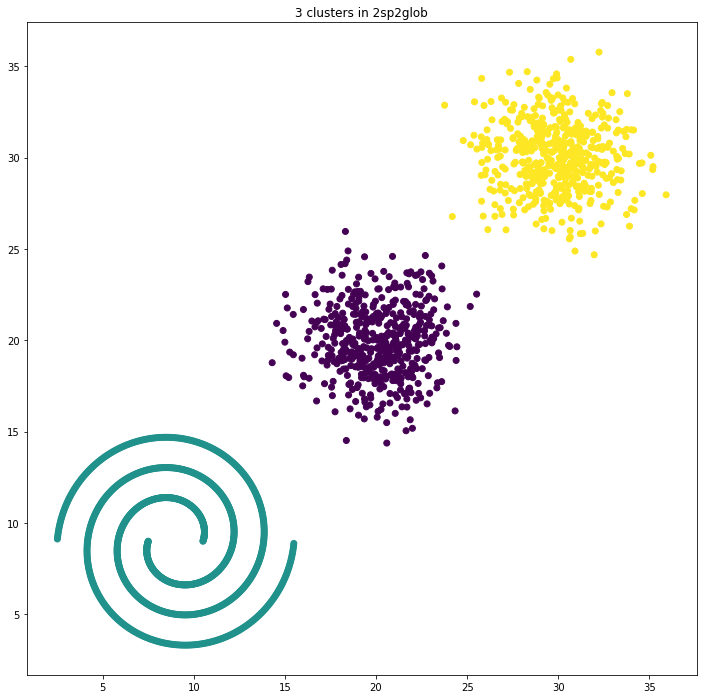

In [112]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### 2 Clustering k-means

plt.figure(figsize=(12, 12))

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]

npliste = np.array([x for x in liste])
    
pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(npliste)
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("3 clusters in 2sp2glob")
plt.show()


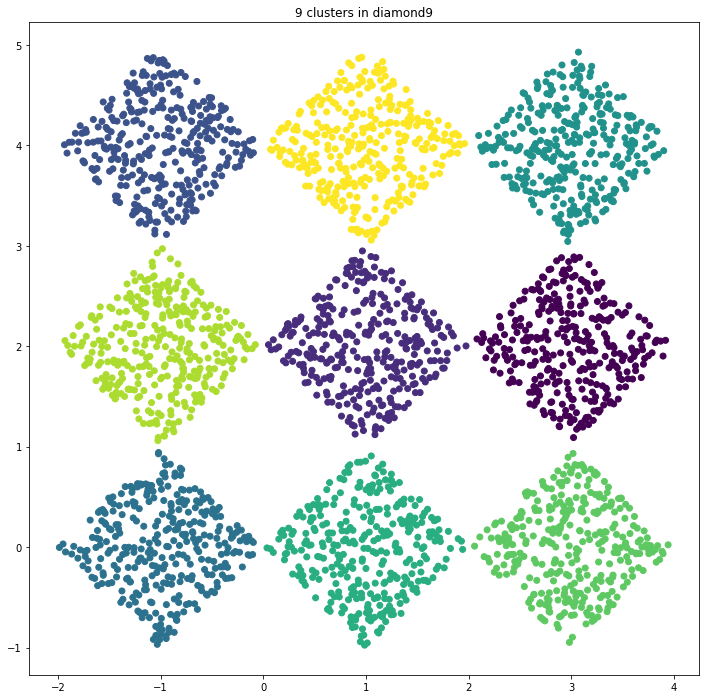

In [113]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

### 2 Clustering k-means (suite)

plt.figure(figsize=(12, 12))

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/diamond9.arff','r'))[0]
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]

npliste = np.array([x for x in liste])

pred = KMeans(n_clusters=9, random_state=random_state).fit_predict(npliste)
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("9 clusters in diamond9")
plt.show()


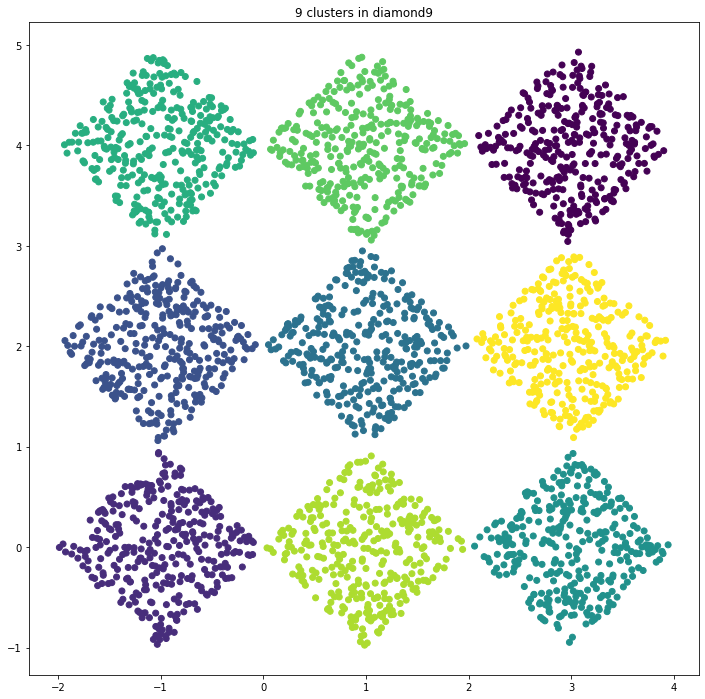

mesures :
[0.3518107901463774, 0.38789474031923604, 0.3931402610788552, 0.4145170726979948, 0.4133331641849272, 0.46588978118120233, 0.5003835962196275, 0.5487609071066126, 0.5221451410830945, 0.49331204712236226, 0.4717058611870848]
temps :
[0.05485367774963379, 0.06183338165283203, 0.09275126457214355, 0.11170196533203125, 0.1376326084136963, 0.129652738571167, 0.13962650299072266, 0.11269783973693848, 0.16954636573791504, 0.18650221824645996, 0.20467162132263184]


In [135]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

plt.figure(figsize=(12, 12))

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/diamond9.arff','r'))[0]
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]

npliste = np.array([x for x in liste])

pred = KMeans(n_clusters=9, random_state=random_state).fit_predict(npliste)
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("9 clusters in diamond9")
plt.show()

t1 = time.time()

kmeans_model = KMeans(n_clusters=9, random_state=1).fit(npliste)
labels = kmeans_model.labels_
mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')

temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("mesures :")
print(mesures)
print("temps :")
print(temps)

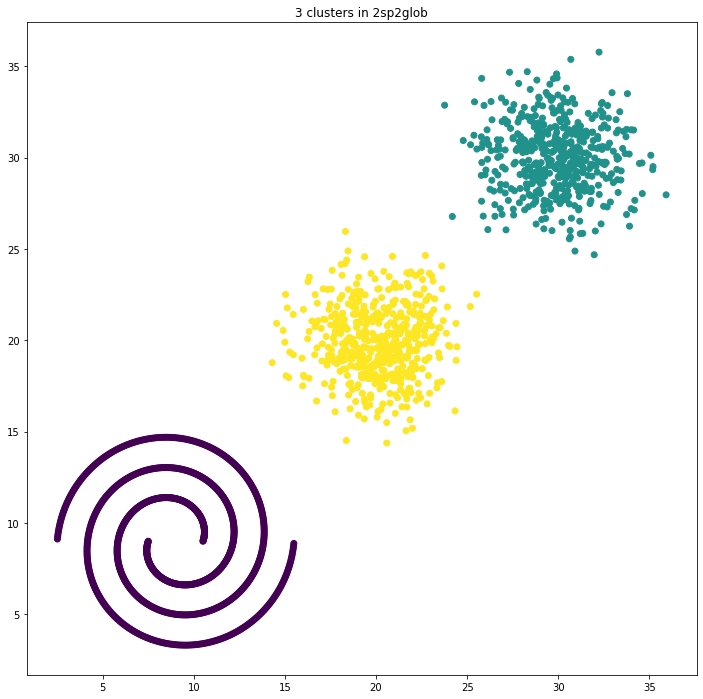

mesures :
[0.6614755677743188, 0.6959623087142756, 0.5463452812235728, 0.5562326606232584, 0.5557132003961633, 0.4485180880207061, 0.35809748242549444, 0.3423592998458644, 0.35148285480675123, 0.35655556764382806, 0.34982801654203866]
temps :
[0.03590250015258789, 0.029921293258666992, 0.09275269508361816, 0.06382894515991211, 0.10372543334960938, 0.11668872833251953, 0.13962721824645996, 0.12566375732421875, 0.16156792640686035, 0.15059661865234375, 0.18550467491149902]


In [134]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

plt.figure(figsize=(12, 12))

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]

npliste = np.array([x for x in liste])

pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(npliste)
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("3 clusters in 2sp2glob")
plt.show()


temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("mesures :")
print(mesures)
print("temps :")
print(temps)

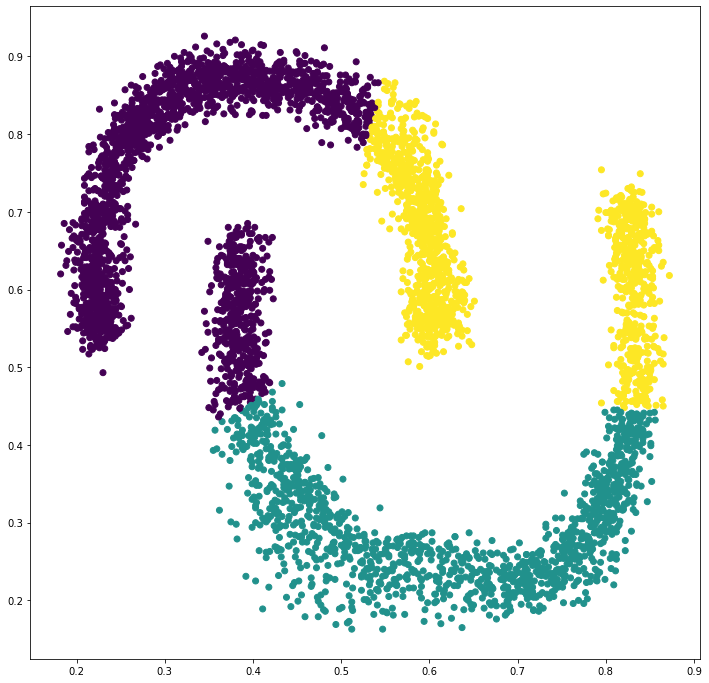

mesures :
[0.4645176710141286, 0.45433486116760763, 0.4622528491068144, 0.4761982714793874, 0.5053913183123184, 0.5017891958778578, 0.5218104279836476, 0.5211904861295221, 0.5200264563848813, 0.5175759030700723, 0.5116801970054228]
temps :
[0.05781078338623047, 0.11366152763366699, 0.11768317222595215, 0.1256396770477295, 0.1555800437927246, 0.17752432823181152, 0.16256380081176758, 0.16552376747131348, 0.20145201683044434, 0.21140217781066895, 0.2154226303100586]


In [137]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

plt.figure(figsize=(12, 12))

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/banana.arff','r'))[0]
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]

npliste = np.array([x for x in liste])

pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(npliste)
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.show()


temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("mesures :")
print(mesures)
print("temps :")
print(temps)

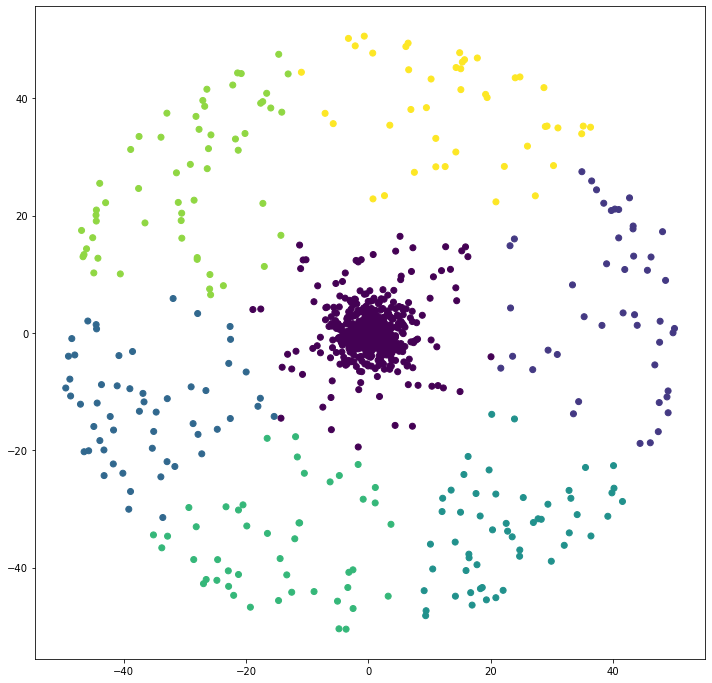

mesures :
[0.48844811069666827, 0.5353880315412627, 0.5942546828244222, 0.6349775464938121, 0.6464329467851837, 0.6494205053905422, 0.6419923408531159, 0.636739406240634, 0.3424234034755847, 0.35743010939558567, 0.5369904214820488]
temps :
[0.0359034538269043, 0.056847572326660156, 0.060837745666503906, 0.06382966041564941, 0.06482601165771484, 0.10571742057800293, 0.07380342483520508, 0.10471463203430176, 0.10272598266601562, 0.11768555641174316, 0.11469316482543945]


In [139]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

plt.figure(figsize=(12, 12))

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/atom.arff','r'))[0]
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]

npliste = np.array([x for x in liste])

pred = KMeans(n_clusters=7, random_state=random_state).fit_predict(npliste)
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.show()


temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("mesures :")
print(mesures)
print("temps :")
print(temps)

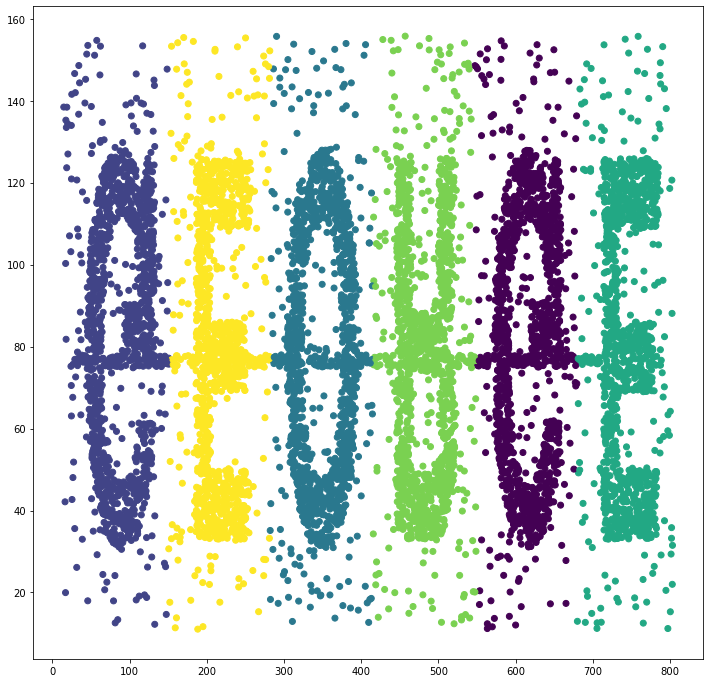

mesures :
[0.6120164163212516, 0.5810637833408603, 0.5070122195555214, 0.5053077102205672, 0.5517762356363312, 0.5089204668052257, 0.46896364381856637, 0.42774191937898337, 0.4065508260713208, 0.38790652234794226, 0.38035061782280094]
temps :
[0.058843135833740234, 0.07978510856628418, 0.10072922706604004, 0.10969233512878418, 0.11266660690307617, 0.1415882110595703, 0.17651867866516113, 0.1655559539794922, 0.21439456939697266, 0.2343730926513672, 0.28919363021850586]


In [142]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

plt.figure(figsize=(12, 12))

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/cluto-t5-8k.arff','r'))[0]
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]

npliste = np.array([x for x in liste])

pred = KMeans(n_clusters=6, random_state=random_state).fit_predict(npliste)
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.show()


temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("mesures :")
print(mesures)
print("temps :")
print(temps)

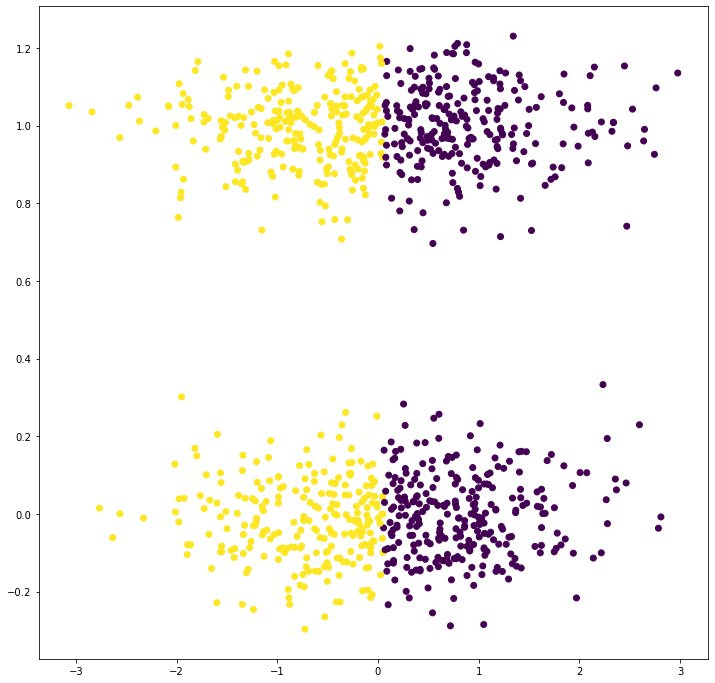

mesures :
[0.42909178188054176, 0.34921534230543316, 0.4177315721834271, 0.4418962307018588, 0.4680781472537593, 0.4888522731891721, 0.4869375649452235, 0.46938348605448843, 0.48310757897039736, 0.49027751381385143, 0.4832880833378921]
temps :
[0.0388946533203125, 0.05983901023864746, 0.07679462432861328, 0.08876228332519531, 0.11568999290466309, 0.1156916618347168, 0.11469268798828125, 0.129652738571167, 0.13962626457214355, 0.13763189315795898, 0.11569094657897949]


In [146]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time

### 2 Clustering k-means (metrics)

plt.figure(figsize=(12, 12))

data = arff.loadarff(open('./clustering-benchmark-master/src/main/resources/datasets/artificial/long1.arff','r'))[0]
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]

npliste = np.array([x for x in liste])

pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(npliste)
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.show()


temps = []
mesures = []
for i in range(2, 13):
    t1 = time.time()
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(npliste)
    t2 = time.time()
    labels = kmeans_model.labels_
    mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
    temps += [t2-t1]
    mesures += [mesure]

print("mesures :")
print(mesures)
print("temps :")
print(temps)